# Syed Haadi Raza (SP21-BDS-020)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from tabulate import tabulate
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

# importing the training and testing dataset

In [2]:
train_data = pd.read_csv(r"C:\Users\Hp\Desktop\groundtruth_dataset.csv")
test_data = pd.read_csv(r"C:\Users\Hp\Desktop\prediction_set_with_class.csv")

# Data pre-processing and comparison between test and train

In [3]:
test_data.shape

(19103, 55)

In [4]:
train_data.shape

(240, 55)

In [5]:
test_data.isnull().sum()

Unnamed: 0                  0
0_drops                     0
10p_adTime                  0
10p_pfx_medianVis           0
1p_MOASlen                  0
6months_percent             0
85p_beta_daybins            0
85p_beta_monthbins          0
85p_beta_weekbins           0
90p_adTime                  0
90p_pfx_medianVis           0
95p_alpha_daybins           0
95p_alpha_monthbins         0
95p_alpha_weekbins          0
99p_MOASlen                 0
ASN                         0
MOAS_add%                   0
MOAS_pfx_%                  0
Uptime                      0
bogons%_add                 0
bogons%_pfx                 0
highMaxVis_percent          0
highMedVis_percent          0
lowMaxVis_percent           0
lowMedVis_percent           0
median/unique_pfx           0
median_adTime               0
median_adTime_highMaxVis    0
median_adTime_highMedVis    0
median_adTime_lowMaxVis     0
median_adTime_lowMedVis     0
median_pfx_medianVis        0
q1_adTime                   0
q1_adTime_

In [6]:
train_data.isnull().sum()

Unnamed: 0                  0
0_drops                     0
10p_adTime                  0
10p_pfx_medianVis           0
1p_MOASlen                  0
6months_percent             0
85p_beta_daybins            0
85p_beta_monthbins          0
85p_beta_weekbins           0
90p_adTime                  0
90p_pfx_medianVis           0
95p_alpha_daybins           0
95p_alpha_monthbins         0
95p_alpha_weekbins          0
99p_MOASlen                 0
ASN                         0
MOAS_add%                   0
MOAS_pfx_%                  0
Uptime                      0
bogons%_add                 0
bogons%_pfx                 0
highMaxVis_percent          0
highMedVis_percent          0
lowMaxVis_percent           0
lowMedVis_percent           0
median/unique_pfx           0
median_adTime               0
median_adTime_highMaxVis    0
median_adTime_highMedVis    0
median_adTime_lowMaxVis     0
median_adTime_lowMedVis     0
median_pfx_medianVis        0
q1_adTime                   0
q1_adTime_

In [7]:
test_data.rename(columns={'HardVotePred': 'class'}, inplace=True)

In [8]:
columns_match = (test_data.columns == train_data.columns).all()
dtypes_match = (test_data.dtypes.values == train_data.dtypes.values).all()

print("Column Names Match: ", columns_match)
print("Data Types Match: ", dtypes_match)


Column Names Match:  True
Data Types Match:  True


In [9]:
null_counts_train = train_data.isnull().sum()
null_counts_test = test_data.isnull().sum()

null_counts_dissimilarity = (null_counts_train != null_counts_test).sum()

print("Dissimilarity of Null Counts:")
print(null_counts_dissimilarity)


Dissimilarity of Null Counts:
0


In [10]:
TargetVariable1 = train_data['class']
CategoricalVariables = []
ContinousVariables = []
RedundantVariables = []
PredictorVariables = []

for column in train_data.columns:
    if train_data[column].isnull().sum() > 200:
        RedundantVariables.append(column)
    else:
        if column not in [TargetVariable1.name]:
            if train_data[column].dtype == "object":
                CategoricalVariables.append(column)
            elif train_data[column].dtype == "float64":
                ContinousVariables.append(column)
            elif train_data[column].dtype == 'int64':
                if train_data[column].nunique() < 10:
                    CategoricalVariables.append(column)
                else:
                    ContinousVariables.append(column)

# Exploratory Data Analysis

In [11]:
sample_test_data = test_data.sample(n=240, random_state=42)

count    240.000000
mean       0.095833
std        0.294978
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: class, dtype: float64

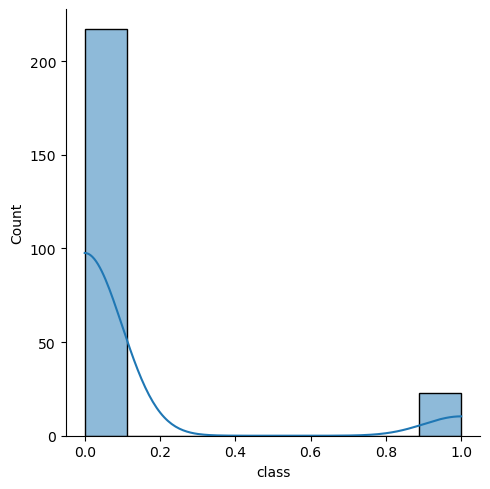

In [12]:
sns.displot(train_data['class'] == 1, kde= True)
train_data['class'].describe()

count    240.000000
mean       0.095833
std        0.294978
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: class, dtype: float64

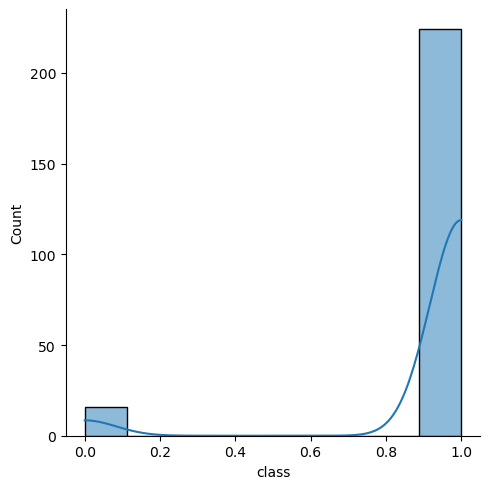

In [13]:
sns.displot(sample_test_data['class'] == 0, kde= True)
train_data['class'].describe()

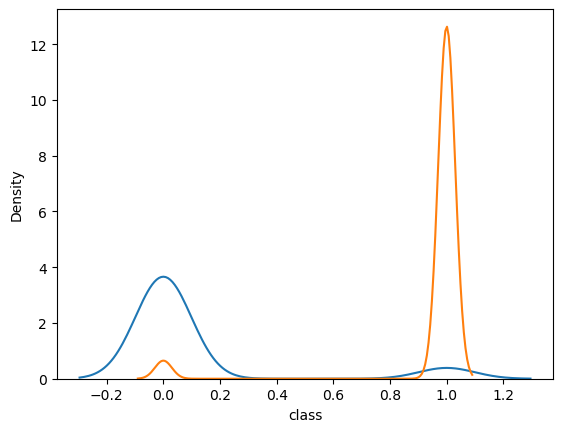

In [14]:
sns.distplot(train_data['class']==1,hist=False)
sns.distplot(test_data['class']==0,hist=False)
plt.show()

In [15]:
train_data['class'].value_counts()


0    217
1     23
Name: class, dtype: int64

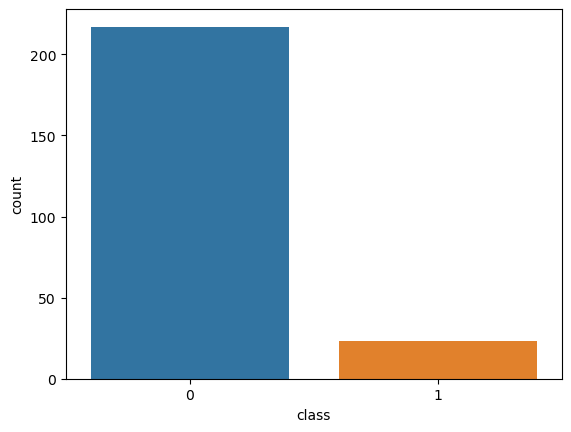

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=train_data)
plt.show()


In [17]:
print(train_data[ContinousVariables].sum().count())
print(train_data[CategoricalVariables].sum().count())

53
1


In [18]:
ContinousVariables

['Unnamed: 0',
 '0_drops',
 '10p_adTime',
 '10p_pfx_medianVis',
 '1p_MOASlen',
 '6months_percent',
 '85p_beta_daybins',
 '85p_beta_monthbins',
 '85p_beta_weekbins',
 '90p_adTime',
 '90p_pfx_medianVis',
 '95p_alpha_daybins',
 '95p_alpha_monthbins',
 '95p_alpha_weekbins',
 '99p_MOASlen',
 'ASN',
 'MOAS_add%',
 'MOAS_pfx_%',
 'Uptime',
 'bogons%_add',
 'bogons%_pfx',
 'highMaxVis_percent',
 'highMedVis_percent',
 'lowMaxVis_percent',
 'lowMedVis_percent',
 'median/unique_pfx',
 'median_adTime',
 'median_adTime_highMaxVis',
 'median_adTime_highMedVis',
 'median_adTime_lowMaxVis',
 'median_adTime_lowMedVis',
 'median_pfx_medianVis',
 'q1_adTime',
 'q1_adTime_highMaxVis',
 'q1_adTime_highMedVis',
 'q1_adTime_lowMaxVis',
 'q1_adTime_lowMedVis',
 'q1_pfx_medianVis',
 'q3_adTime',
 'q3_adTime_highMaxVis',
 'q3_adTime_highMedVis',
 'q3_adTime_lowMaxVis',
 'q3_adTime_lowMedVis',
 'q3_pfx_medianVis',
 'range_MOASlen',
 'rir_gini_add',
 'rir_gini_pfx',
 'std_MOASlen',
 'top_rir_add',
 'top_rir_pfx'

In [19]:
CategoricalVariables

['rir_count']

In [20]:
RedundantVariables

[]

In [21]:
CorrelationData = train_data[ContinousVariables]
CorrelationData['class'] = TargetVariable1
CorrelationMatrix = CorrelationData.corr()
CorrelationMatrix

,Unnamed: 0,0_drops,10p_adTime,10p_pfx_medianVis,1p_MOASlen,6months_percent,85p_beta_daybins,85p_beta_monthbins,85p_beta_weekbins,90p_adTime,90p_pfx_medianVis,95p_alpha_daybins,95p_alpha_monthbins,95p_alpha_weekbins,99p_MOASlen,ASN,MOAS_add%,MOAS_pfx_%,Uptime,bogons%_add,bogons%_pfx,highMaxVis_percent,highMedVis_percent,lowMaxVis_percent,lowMedVis_percent,median/unique_pfx,median_adTime,median_adTime_highMaxVis,median_adTime_highMedVis,median_adTime_lowMaxVis,median_adTime_lowMedVis,median_pfx_medianVis,q1_adTime,q1_adTime_highMaxVis,q1_adTime_highMedVis,q1_adTime_lowMaxVis,q1_adTime_lowMedVis,q1_pfx_medianVis,q3_adTime,q3_adTime_highMaxVis,q3_adTime_highMedVis,q3_adTime_lowMaxVis,q3_adTime_lowMedVis,q3_pfx_medianVis,range_MOASlen,rir_gini_add,rir_gini_pfx,std_MOASlen,top_rir_add,top_rir_pfx,unassigned%_add,unassigned%_pfx,var_MOASlen,class
Unnamed: 0,1.000000,0.119873,-0.107801,-0.054557,0.085899,-0.006649,0.041344,0.098586,0.113413,0.007703,0.013220,0.039878,-0.011605,0.073581,-0.005798,0.030000,0.001668,0.035374,0.029325,-0.121157,0.004800,-0.069815,-0.117567,0.059233,0.034794,-0.025419,-0.097793,-0.045882,-0.060143,-0.065395,0.012798,-0.103953,-0.123887,-0.106926,-0.107987,-0.116396,-0.066644,-0.093992,-0.016242,0.015871,0.019741,0.009891,0.021060,-0.060371,0.033363,0.044935,0.042005,0.068147,0.027625,0.026035,-0.131027,0.019026,0.042515,0.036061
0_drops,0.119873,1.000000,-0.001769,0.054189,0.005542,0.058632,0.300679,0.535834,0.637123,-0.156793,0.017644,0.381739,0.030949,0.197880,0.012856,0.161072,0.183106,0.170824,-0.037163,0.015464,-0.021276,0.054202,0.049617,-0.064051,-0.036749,0.024972,-0.046023,-0.105567,-0.124078,-0.019931,0.017511,0.020678,-0.041295,-0.086143,-0.099474,-0.029206,-0.001151,0.034525,-0.093584,-0.164829,-0.186962,-0.016398,0.007063,-0.004501,-0.079300,-0.074096,-0.055268,-0.018965,-0.051173,-0.045861,-0.060771,-0.034998,-0.035179,0.269240
10p_adTime,-0.107801,-0.001769,1.000000,0.419822,-0.046638,0.445207,0.028533,-0.080582,-0.029631,0.189435,0.130769,-0.096951,-0.102016,-0.117785,-0.040913,-0.051738,0.027004,-0.015863,0.078660,-0.028203,-0.026706,0.284309,0.320861,-0.186911,-0.249069,0.542818,0.497906,0.353457,0.311520,-0.009054,-0.012851,0.242275,0.766535,0.604037,0.488760,-0.018426,0.025640,0.309706,0.321464,0.194442,0.172023,-0.036373,-0.037362,0.183636,-0.167606,0.120531,0.125249,-0.082862,0.130259,0.126732,-0.049215,0.059642,-0.105984,-0.082170
10p_pfx_medianVis,-0.054557,0.054189,0.419822,1.000000,-0.086763,0.489984,0.011793,-0.113294,-0.050146,0.282978,0.352048,-0.138166,-0.136111,-0.217849,-0.088377,-0.005102,-0.012607,-0.010839,0.107669,0.018227,-0.080237,0.671813,0.780481,-0.469432,-0.708724,0.498576,0.507794,0.219393,0.127042,-0.164558,-0.215692,0.645577,0.492626,0.268265,0.162282,-0.102937,-0.169544,0.817657,0.423508,0.127330,0.040425,-0.154732,-0.250141,0.492490,-0.248877,-0.004813,0.014170,-0.110994,-0.006048,0.018352,0.006698,0.210935,-0.117366,0.076062
1p_MOASlen,0.085899,0.005542,-0.046638,-0.086763,1.000000,0.135799,-0.179708,-0.029691,-0.098053,0.229494,0.262404,0.042596,-0.032414,0.087174,0.862452,-0.139315,0.252693,0.338374,0.355705,0.040112,0.015238,0.081787,0.035143,-0.073108,-0.132892,0.023817,0.043217,0.136974,0.089840,0.091001,0.030323,0.055592,-0.076538,0.025059,-0.024274,0.080774,-0.037655,-0.021429,0.142729,0.219011,0.214745,0.095407,0.052506,0.169988,0.289718,-0.105868,-0.123262,0.920960,-0.109567,-0.128878,0.101527,0.063534,0.758939,0.057480
6months_percent,-0.006649,0.058632,0.445207,0.489984,0.135799,1.000000,-0.073191,-0.094579,-0.062677,0.695480,0.435363,-0.022516,-0.324482,-0.057329,0.082453,-0.105266,0.164577,0.235270,0.343428,-0.004312,-0.037556,0.606042,0.549396,-0.398925,-0.534663,0.796343,0.818741,0.554426,0.446933,0.155677,0.290522,0.519201,0.638904,0.500661,0.416556,0.075468,0.208392,0.508496,0.846437,0.508932,0.441541,0.187294,0.292162,0.452971,0.072867,0.189405,0.149778,0.132837,0.181334,0.147374,-0.007006,0.076046,0.108137,-0.237631
85p_beta_daybins,0.0413

In [22]:
class_corr_values = abs(CorrelationMatrix['class'].drop('class'))
mean_corr_value = class_corr_values.mean()

print(f"Mean Correlation for 'class': {mean_corr_value:.4f}")

Mean Correlation for 'class': 0.1789


In [23]:
threshold = mean_corr_value
corr_with_class = abs(CorrelationMatrix['class'])
selected_features_mask = corr_with_class >= threshold
selected_features = CorrelationMatrix[selected_features_mask].sort_values(by='class', ascending=False).index

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['class', 'ASN', '0_drops', '85p_beta_weekbins', '85p_beta_monthbins',
       '85p_beta_daybins', '95p_alpha_daybins', 'median_adTime',
       'median/unique_pfx', 'q1_adTime_highMaxVis', 'q1_adTime_highMedVis',
       '6months_percent', 'q3_adTime', 'median_adTime_highMaxVis',
       'median_adTime_highMedVis', '90p_adTime', 'q3_adTime_highMaxVis',
       'q3_adTime_highMedVis', 'top_rir_pfx', 'rir_gini_pfx', 'top_rir_add',
       'rir_gini_add'],
      dtype='object')


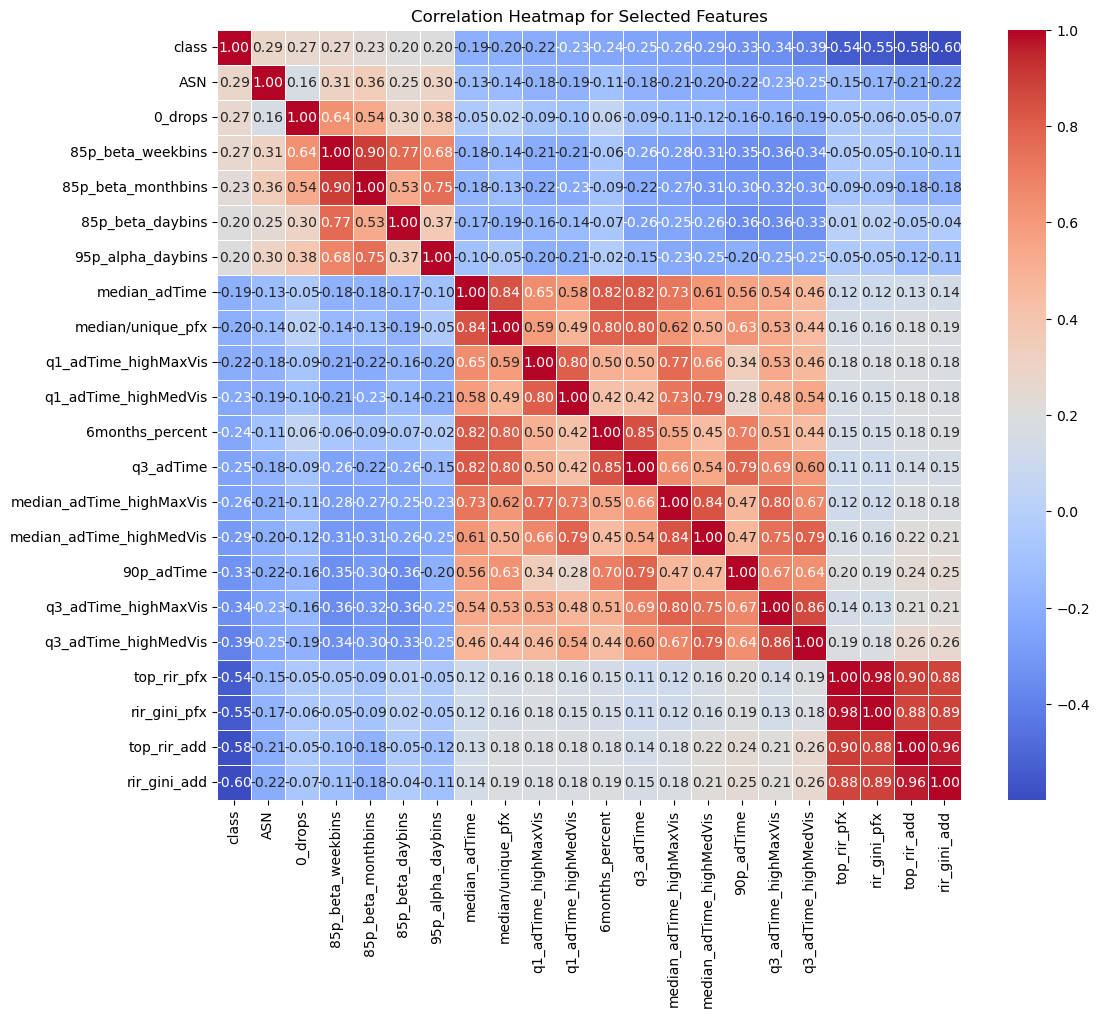

In [24]:
selected_features_with_class = train_data[selected_features] + train_data['class'] 
selected_corr_data = train_data[selected_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [25]:
train_data[selected_features].shape

(240, 22)

In [26]:
for variable in selected_features:
    PredictorVariables.append(variable)

In [27]:
for variable in CategoricalVariables:
    PredictorVariables.append(variable)

In [28]:
PredictorVariables

['class',
 'ASN',
 '0_drops',
 '85p_beta_weekbins',
 '85p_beta_monthbins',
 '85p_beta_daybins',
 '95p_alpha_daybins',
 'median_adTime',
 'median/unique_pfx',
 'q1_adTime_highMaxVis',
 'q1_adTime_highMedVis',
 '6months_percent',
 'q3_adTime',
 'median_adTime_highMaxVis',
 'median_adTime_highMedVis',
 '90p_adTime',
 'q3_adTime_highMaxVis',
 'q3_adTime_highMedVis',
 'top_rir_pfx',
 'rir_gini_pfx',
 'top_rir_add',
 'rir_gini_add',
 'rir_count']

# Prediction Modelling for the sample test dataset

In [29]:
SX_train = train_data[PredictorVariables]
Sy_train = train_data['class']

SX_test = sample_test_data[PredictorVariables]
Sy_test = sample_test_data['class']

scaler = StandardScaler()
SX_train_scaled = scaler.fit_transform(SX_train)
SX_test_scaled = scaler.transform(SX_test)

class_weights = compute_class_weight('balanced', classes=np.unique(Sy_train), y=Sy_train)

class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(Sy_train), class_weights)}

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(SX_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(SX_train_scaled, Sy_train, epochs=100, batch_size=32, class_weight=class_weight_dict)

Sy_test_probs = model.predict(SX_test_scaled)

threshold = 0.5
Sy_test_pred = (Sy_test_probs > threshold).astype(int)



Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7125
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8292
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8875
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9292
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9500
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.9625
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9708
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9750
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.9833
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9917
Epoch 11/100
8/8 [===========

# Evaluation Metrics for Prediction Modelling over Sample Test Dataset

In [30]:
Saccuracy = accuracy_score(Sy_test, Sy_test_pred)
Sclassification_report_result = classification_report(Sy_test, Sy_test_pred)

print(f'\nTest Accuracy: {Saccuracy:.4f}')
print('\nClassification Report:')
print(Sclassification_report_result)

Sreport_lines = Sclassification_report_result.split('\n')

Sprecision_0 = float(Sreport_lines[2].split()[1])
Srecall_0 = float(Sreport_lines[2].split()[2])
Sprecision_1 = float(Sreport_lines[3].split()[1])
Srecall_1 = float(Sreport_lines[3].split()[2])

Stable_metrics = [['Class', 'Accuracy', 'Precision', 'Recall'],
                  ['Class 0', Saccuracy, Sprecision_0, Srecall_0],
                  ['Class 1', Saccuracy, Sprecision_1, Srecall_1]]

print('Model Evaluation Metrics:')
print(tabulate(Stable_metrics, headers='firstrow', tablefmt='fancy_grid'))



Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        16

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Model Evaluation Metrics:
╒═════════╤════════════╤═════════════╤══════════╕
│ Class   │   Accuracy │   Precision │   Recall │
╞═════════╪════════════╪═════════════╪══════════╡
│ Class 0 │          1 │           1 │        1 │
├─────────┼────────────┼─────────────┼──────────┤
│ Class 1 │          1 │           1 │        1 │
╘═════════╧════════════╧═════════════╧══════════╛


# ROC and Precision-Recall Curve for Sample Test Predictions

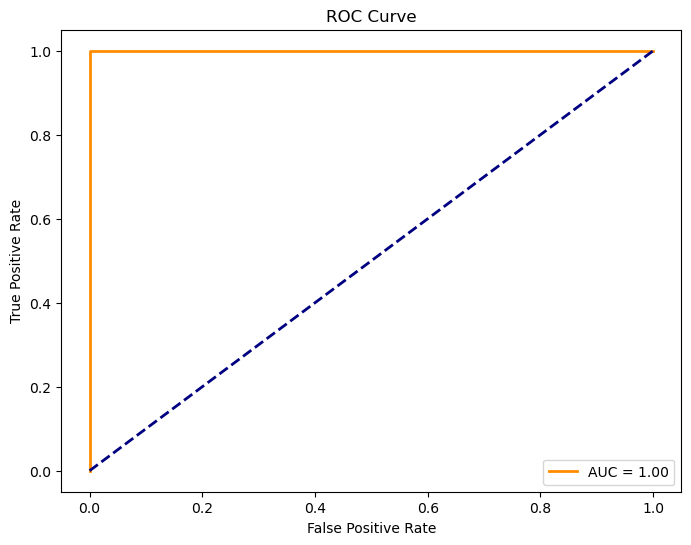

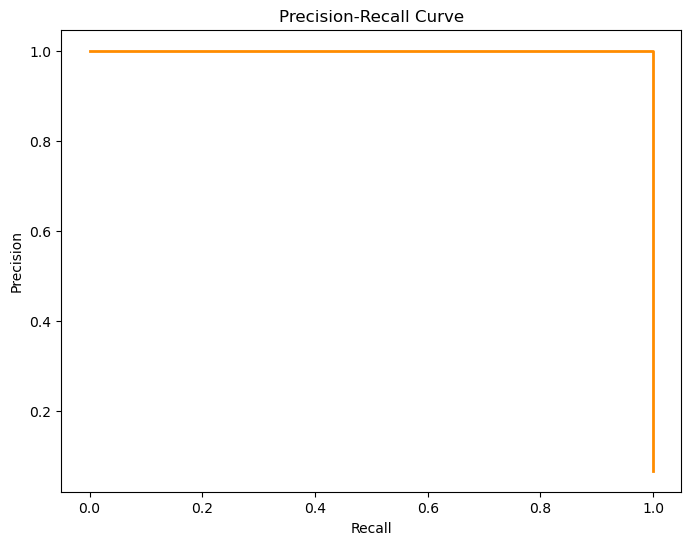

In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, _ = roc_curve(Sy_test, Sy_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(Sy_test, Sy_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Prediction Modelling for the Original Test Dataset

In [32]:
X_train = train_data[PredictorVariables]
y_train = train_data['class']

X_test = test_data[PredictorVariables]
y_test = test_data['class']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, class_weight=class_weight_dict)

y_test_probs = model.predict(X_test_scaled)

threshold = 0.5
y_test_pred = (y_test_probs > threshold).astype(int)




Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.7502 - accuracy: 0.5542
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.8250
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8833
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.9250
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2806 - accuracy: 0.9458
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.9667
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9667
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9708
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 0.9750
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9792
Epoch 11/100
8/8 [===========

# Evaluation Metrics for Prediction Modelling over Original Test Dataset

In [33]:
accuracy = accuracy_score(y_test, y_test_pred)
classification_report_result = classification_report(y_test, y_test_pred)

print(f'\nTest Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report_result)

report_lines = classification_report_result.split('\n')

precision_0 = float(report_lines[2].split()[1])
recall_0 = float(report_lines[2].split()[2])
precision_1 = float(report_lines[3].split()[1])
recall_1 = float(report_lines[3].split()[2])

accuracy = accuracy_score(y_test, y_test_pred)

table_metrics = [['Class', 'Accuracy', 'Precision', 'Recall'],
                 ['Class 0', accuracy, precision_0, recall_0],
                 ['Class 1', accuracy, precision_1, recall_1]]

print('Model Evaluation Metrics:')
print(tabulate(table_metrics, headers='firstrow', tablefmt='fancy_grid'))


Test Accuracy: 0.9976

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18169
           1       0.98      0.97      0.98       934

    accuracy                           1.00     19103
   macro avg       0.99      0.98      0.99     19103
weighted avg       1.00      1.00      1.00     19103

Model Evaluation Metrics:
╒═════════╤════════════╤═════════════╤══════════╕
│ Class   │   Accuracy │   Precision │   Recall │
╞═════════╪════════════╪═════════════╪══════════╡
│ Class 0 │   0.997592 │        1    │     1    │
├─────────┼────────────┼─────────────┼──────────┤
│ Class 1 │   0.997592 │        0.98 │     0.97 │
╘═════════╧════════════╧═════════════╧══════════╛


# ROC and Precision-Recall Curve for Original Test Predictions

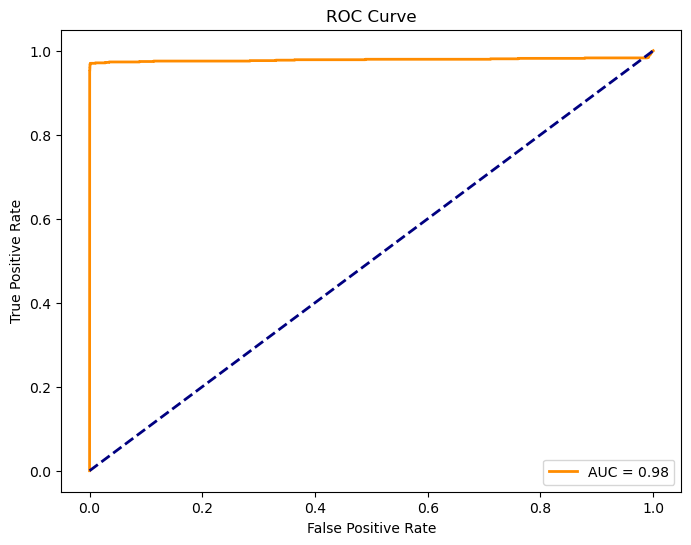

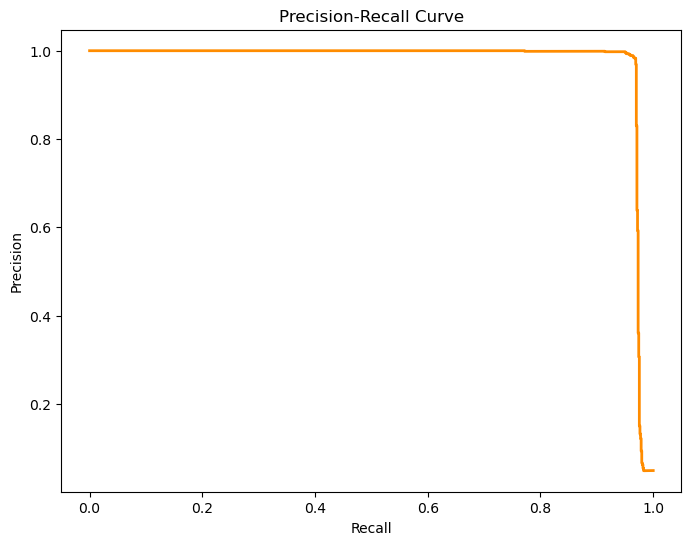

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
